# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Dataset

In [3]:
df = pd.read_csv("Wholesale customers data.csv")

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
## Checking Nulls

df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
## Checking Duplicates

df.duplicated().sum()

0

## Univariate Analysis

In [7]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

### Checking Data Distribution of Channel 

In [9]:
df.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

Imbalanced Class

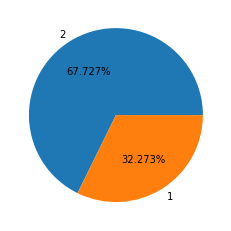

In [13]:
plt.pie(df.Channel.value_counts(),
       labels = df.Channel.unique(),
       autopct = '%0.3f%%');

### Checking Data Distribution of Region

In [15]:
df.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

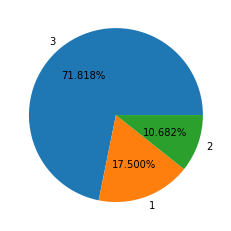

In [17]:
plt.pie(df.Region.value_counts(),
       labels = df.Region.unique(),
       autopct = '%0.3f%%');

Severe Class Imbalance

### Checking total unique values in different columns

In [29]:
for col in df.iloc[:, 2:].columns:
    print("Total Unique values in ", col)
    a = df[col].nunique()
    print(a, '\n', "*"*40)

Total Unique values in  Fresh
433 
 ****************************************
Total Unique values in  Milk
421 
 ****************************************
Total Unique values in  Grocery
430 
 ****************************************
Total Unique values in  Frozen
426 
 ****************************************
Total Unique values in  Detergents_Paper
417 
 ****************************************
Total Unique values in  Delicassen
403 
 ****************************************


### Checking Data Distribution

Feature:  Fresh


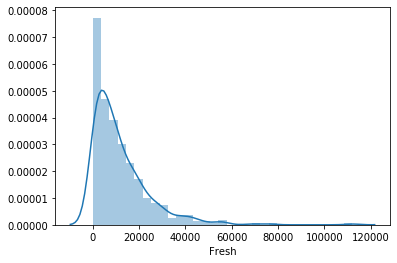

*****************************************************************************************************************************
Feature:  Milk


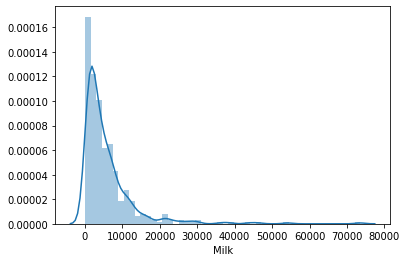

*****************************************************************************************************************************
Feature:  Grocery


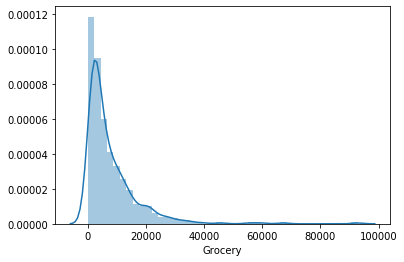

*****************************************************************************************************************************
Feature:  Frozen


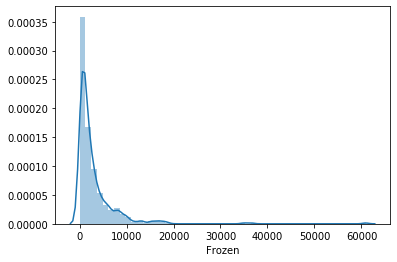

*****************************************************************************************************************************
Feature:  Detergents_Paper


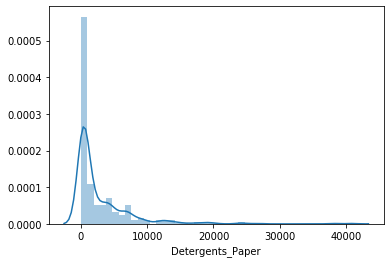

*****************************************************************************************************************************
Feature:  Delicassen


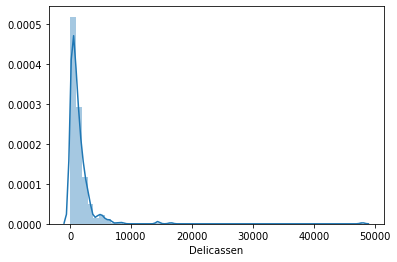

*****************************************************************************************************************************


In [30]:
for col in df.iloc[:, 2:].columns:
    print("Feature: ", col)
    sns.distplot(df[col])
    plt.show()
    print("*"*125)

Skewed Distributions

### Boxplots

Feature:  Fresh


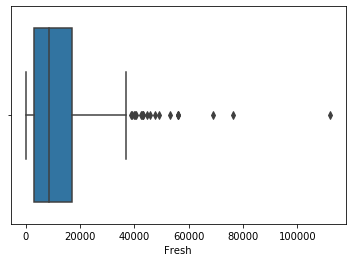

*****************************************************************************************************************************
Feature:  Milk


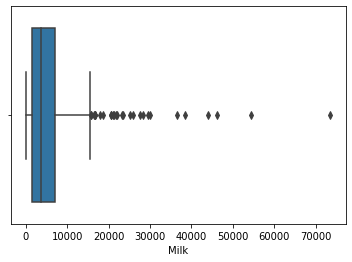

*****************************************************************************************************************************
Feature:  Grocery


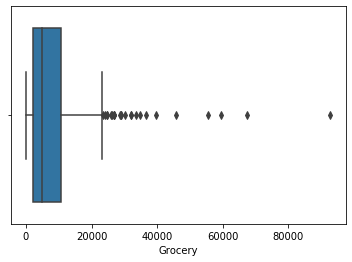

*****************************************************************************************************************************
Feature:  Frozen


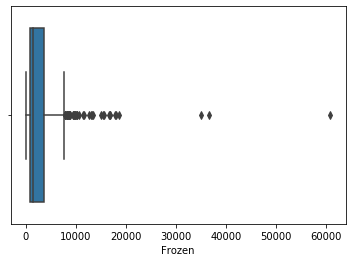

*****************************************************************************************************************************
Feature:  Detergents_Paper


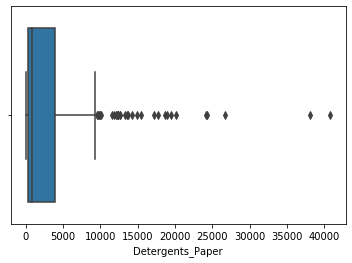

*****************************************************************************************************************************
Feature:  Delicassen


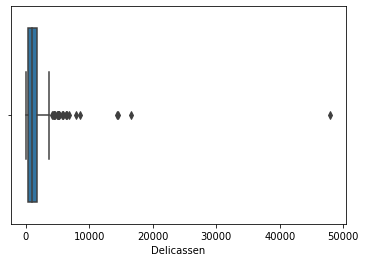

*****************************************************************************************************************************


In [31]:
for col in df.iloc[:, 2:].columns:
    print("Feature: ", col)
    sns.boxplot(df[col])
    plt.show()
    print("*"*125)

### Treating Outliers

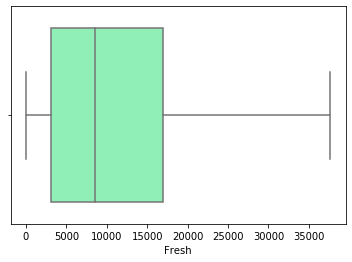

**************************************************************************************************** 




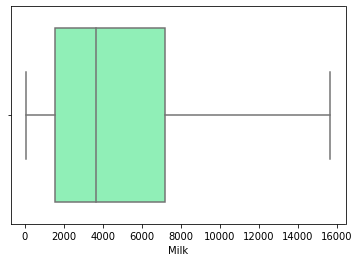

**************************************************************************************************** 




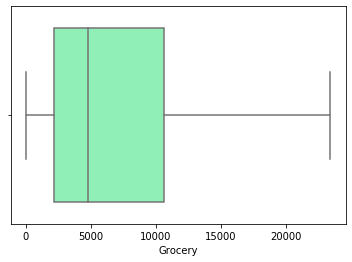

**************************************************************************************************** 




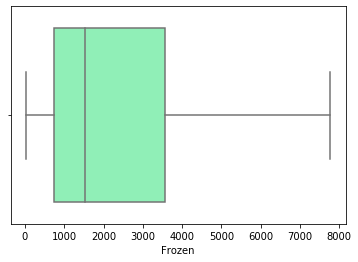

**************************************************************************************************** 




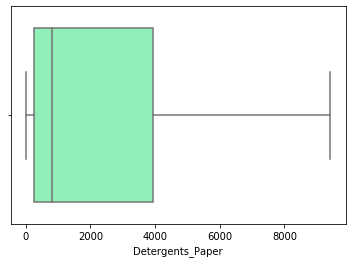

**************************************************************************************************** 




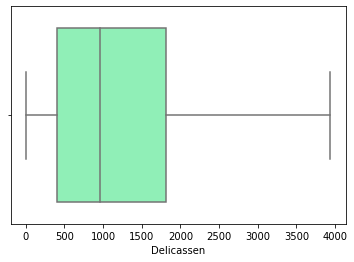

**************************************************************************************************** 




In [32]:
for col in df.iloc[:, 2:].columns:
    if df[col].dtype != object:
        
        q1, q3 = np.percentile(df[col], [25,75])
        
        iqr = q3-q1
        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)
        
        df[col] = df[col].apply(lambda x: upper_fence if x > upper_fence else lower_fence if x< lower_fence else x)
        sns.boxplot(x = df[col], data= df, palette='rainbow', orient='h')
        plt.show()
        print('*'*100, '\n'*2)

## Bivariate Analysis

In [23]:
df.groupby(['Channel', 'Region'])['Milk'].sum().to_frame()

Milk
Channel Region         
1       1        228342
        2         64519
        3        735753
2       1        194112
        2        174625
        3       1153006

In [39]:
df.groupby(['Channel', 'Region'])['Fresh'].sum().to_frame()

Fresh
Channel Region            
1       1        717380.25
        2        326215.00
        3       2701258.50
2       1         93600.00
        2        138506.00
        3       1020370.25

In [40]:
df.groupby(['Channel', 'Region'])['Grocery'].sum().to_frame()

Grocery
Channel Region             
1       1        237542.000
        2        123074.000
        3        820101.000
2       1        291474.375
        2        261519.625
        3       1450294.000

In [41]:
df.groupby(['Channel', 'Region'])['Frozen'].sum().to_frame()

Frozen
Channel Region           
1       1       167540.75
        2        92852.50
        3       612758.50
2       1        45965.25
        2        25484.25
        3       158516.50

In [42]:
df.groupby(['Channel', 'Region'])['Detergents_Paper'].sum().to_frame()

Detergents_Paper
Channel Region                  
1       1               56081.00
        2               13516.00
        3              165990.00
2       1              116648.25
        2              117226.25
        3              583289.75

In [43]:
df.groupby(['Channel', 'Region'])['Delicassen'].sum().to_frame()

Delicassen
Channel Region            
1       1         67716.25
        2         29294.25
        3        243386.25
2       1         30078.50
        2         23541.00
        3        163338.50

In all the above cases, Region 3 shows max and tgis can be due to high class imbalance

### Checking Correlation

In [44]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.171717,0.598616,0.719867,-0.254707,0.790080,0.166639
Region,0.062028,1.000000,0.056523,0.005734,0.005301,-0.050604,0.004717,0.016801
Fresh,-0.171717,0.056523,1.000000,-0.037991,-0.098357,0.355487,-0.226033,0.259404
Milk,0.598616,0.005734,-0.037991,1.000000,0.781205,-0.037049,0.691217,0.372097
Grocery,0.719867,0.005301,-0.098357,0.781205,1.000000,-0.137456,0.877444,0.290121
Frozen,-0.254707,-0.050604,0.355487,-0.037049,-0.137456,1.000000,-0.239435,0.237178
Detergents_Paper,0.790080,0.004717,-0.226033,0.691217,0.877444,-0.239435,1.000000,0.161233
Delicassen,0.166639,0.016801,0.259404,0.372097,0.290121,0.237178,0.161233,1.000000


## Preprocessing

### Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)

### Model Making

In [47]:
from sklearn.cluster import KMeans

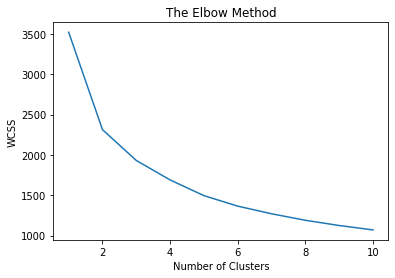

In [48]:
## Elbow Method

distance = []
k = range(1,11)

for value in k:
    km_model = KMeans(n_clusters = value, random_state = 42)
    km_model.fit(scaled_data)
    distance.append(km_model.inertia_)
    
plt.plot(k, distance)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Best Clusters seem to be 2 or 3

### Total 2 Clusters

In [49]:
kmeans = KMeans(n_clusters=2, random_state = 42)

In [50]:
y_pred = kmeans.fit_predict(scaled_data)

y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,

In [55]:
kmeans.inertia_

2313.1399727609337

In [56]:
kmeans.cluster_centers_

array([[ 1.2990748 ,  0.10240059, -0.25548283,  0.9874768 ,  1.14259517,
        -0.34066779,  1.19243102,  0.33879754],
       [-0.62548046, -0.04930399,  0.12301025, -0.47545179, -0.55013842,
         0.16402523, -0.57413345, -0.16312474]])

In [57]:
df['2 clusters result'] = y_pred

In [58]:
df['2 clusters result'].value_counts()

1    297
0    143
Name: 2 clusters result, dtype: int64

### Trying 3 Clusters

In [59]:
kmeans3 = KMeans(n_clusters=3, random_state = 42)

In [60]:
y_pred3 = kmeans3.fit_predict(scaled_data)

y_pred3

array([1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       0, 1, 1, 1, 2, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0,
       2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1,
       2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       1, 0, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1,

In [61]:
kmeans3.inertia_

1930.7863177946454

In [62]:
kmeans3.cluster_centers_

array([[-0.55080043,  0.01443771,  1.15800273, -0.05074196, -0.28953003,
         1.25395039, -0.56105561,  0.6917818 ],
       [ 1.38480242,  0.09855437, -0.33308343,  0.97404208,  1.15661751,
        -0.43884738,  1.27619213,  0.24891223],
       [-0.63032656, -0.06791848, -0.28926669, -0.5880999 , -0.59976628,
        -0.26428919, -0.55790949, -0.45326245]])

In [67]:
df['3 clusters result'] = y_pred3

In [68]:
df['3 clusters result'].value_counts()

2    214
1    134
0     92
Name: 3 clusters result, dtype: int64

### Davies Bouldin Score

In [69]:
import sklearn.metrics

sklearn.metrics.davies_bouldin_score(scaled_data, y_pred3)

1.4597972226185665

In [70]:
sklearn.metrics.davies_bouldin_score(scaled_data, y_pred)

1.2431871200139657

Less for 2 clusters